# 5. How to Log and Visualize Simulations

Here we explain how to take a log of simulation results and how to visualize it. 

In [1]:
%matplotlib inline
import math
from ecell4 import *

## 5.1. Logging Simulations with Observers

E-Cell4 provides special classes for logging, named `Observer`. `Observer` class is given when you call the `run` function of `Simulator`.

In [2]:
def create_simulator(f=gillespie.GillespieFactory()):
    m = NetworkModel()
    A, B, C = Species('A', '0.005', '1'), Species('B', '0.005', '1'), Species('C', '0.005', '1')
    m.add_reaction_rule(create_binding_reaction_rule(A, B, C, 0.01))
    m.add_reaction_rule(create_unbinding_reaction_rule(C, A, B, 0.3))
    w = f.create_world()
    w.bind_to(m)
    w.add_molecules(C, 60)
    sim = f.create_simulator(w)
    sim.initialize()
    return sim

One of most popular `Observer` is `FixedIntervalNumberObserver`, which logs the number of molecules with the given time interval. `FixedIntervalNumberObserver` requires an interval and a list of serials of `Species` for logging.

In [3]:
obs1 = FixedIntervalNumberObserver(0.1, ['A', 'B', 'C'])
sim = create_simulator()
sim.run(1.0, obs1)

`data` function of `FixedIntervalNumberObserver` returns the data logged.

In [4]:
print(obs1.data())

[[0.0, 0.0, 0.0, 60.0], [0.1, 5.0, 5.0, 55.0], [0.2, 5.0, 5.0, 55.0], [0.30000000000000004, 6.0, 6.0, 54.0], [0.4, 7.0, 7.0, 53.0], [0.5, 10.0, 10.0, 50.0], [0.6000000000000001, 12.0, 12.0, 48.0], [0.7000000000000001, 14.0, 14.0, 46.0], [0.8, 15.0, 15.0, 45.0], [0.9, 17.0, 17.0, 43.0], [1.0, 19.0, 19.0, 41.0]]


`targets()` returns a list of `Species`, which you specified as an argument of the constructor.

In [5]:
print([sp.serial() for sp in obs1.targets()])

[u'A', u'B', u'C']


`NumberObserver` logs the number of molecules after every steps when a reaction occurs. This observer is useful to log all reactions, but not available for `ode`.

In [6]:
obs1 = NumberObserver(['A', 'B', 'C'])
sim = create_simulator()
sim.run(1.0, obs1)
print(obs1.data())

[[0.0, 0.0, 0.0, 60.0], [0.029019805060448108, 1.0, 1.0, 59.0], [0.03495024011478438, 2.0, 2.0, 58.0], [0.05709709364756958, 3.0, 3.0, 57.0], [0.08345645028003981, 4.0, 4.0, 56.0], [0.09057295193016185, 5.0, 5.0, 55.0], [0.10317515083645505, 6.0, 6.0, 54.0], [0.39729200456307406, 7.0, 7.0, 53.0], [0.4891152542044806, 8.0, 8.0, 52.0], [0.5105032496421634, 9.0, 9.0, 51.0], [0.5909907243232018, 10.0, 10.0, 50.0], [0.6149286850220566, 11.0, 11.0, 49.0], [0.6555922959661215, 12.0, 12.0, 48.0], [0.6619883640696738, 13.0, 13.0, 47.0], [0.7024105025452289, 14.0, 14.0, 46.0], [0.7243768626467693, 13.0, 13.0, 47.0], [0.7416207547030155, 14.0, 14.0, 46.0], [0.7757128262040989, 15.0, 15.0, 45.0], [0.8424657672693017, 16.0, 16.0, 44.0], [0.8715894814800177, 17.0, 17.0, 43.0], [0.8868458528620995, 18.0, 18.0, 42.0], [0.9711909949631292, 19.0, 19.0, 41.0], [1.0, 19.0, 19.0, 41.0]]


`TimingNumberObserver` allows you to give the times for logging as an argument of its constructor.

In [7]:
obs1 = TimingNumberObserver([0.0, 0.1, 0.2, 0.5, 1.0], ['A', 'B', 'C'])
sim = create_simulator()
sim.run(1.0, obs1)
print(obs1.data())

[[0.0, 0.0, 0.0, 60.0], [0.1, 5.0, 5.0, 55.0], [0.2, 5.0, 5.0, 55.0], [0.5, 11.0, 11.0, 49.0], [1.0, 20.0, 20.0, 40.0]]


`run` function accepts multile `Observer`s at once.

In [8]:
obs1 = NumberObserver(['C'])
obs2 = FixedIntervalNumberObserver(0.1, ['A', 'B'])
sim = create_simulator()
sim.run(1.0, [obs1, obs2])
print(obs1.data())
print(obs2.data())

[[0.0, 60.0], [0.029019805060448108, 59.0], [0.03495024011478438, 58.0], [0.05709709364756958, 57.0], [0.08345645028003981, 56.0], [0.09057295193016185, 55.0], [0.2898497350222479, 54.0], [0.3783003150429667, 53.0], [0.4394727303306939, 52.0], [0.445711259811006, 51.0], [0.4853304756104483, 50.0], [0.517017565973008, 49.0], [0.5507882163097191, 48.0], [0.6289766247450055, 47.0], [0.6442329961270873, 46.0], [0.7693413401404952, 45.0], [0.8692713699605862, 44.0], [0.8886974451196766, 43.0], [0.9301816655020185, 42.0], [0.958460757796255, 41.0], [1.0, 41.0]]
[[0.0, 0.0, 0.0], [0.1, 5.0, 5.0], [0.2, 5.0, 5.0], [0.30000000000000004, 6.0, 6.0], [0.4, 7.0, 7.0], [0.5, 10.0, 10.0], [0.6000000000000001, 12.0, 12.0], [0.7000000000000001, 14.0, 14.0], [0.8, 15.0, 15.0], [0.9, 17.0, 17.0], [1.0, 19.0, 19.0]]


`FixedIntervalHDF5Observedr` logs the whole data in a `World` to an output file with the fixed interval. Its second argument is a prefix for output filenames. `filename()` returns the name of a file scheduled to be saved next. At most one format string like `%02d` is allowed to use a step count in the file name. When you do not use the format string, it overwrites the latest data to the file.

In [9]:
obs1 = FixedIntervalHDF5Observer(0.2, 'test%02d.h5')
print(obs1.filename())
sim = create_simulator()
sim.run(1.0, obs1)
print(obs1.filename())

test00.h5
test06.h5


In [10]:
w = load_world('test05.h5')
print(w.t(), w.num_molecules(Species('C')))

(1.0, 40)


The usage of `FixedIntervalCSVObserver` is almost same with that of `FixedIntervalHDF5Observer`. It saves positions (x, y, z) of particles with the radius (r) and serial number of `Species` (sid) to a CSV file.

In [11]:
obs1 = FixedIntervalCSVObserver(0.2, "test%02d.csv")
print(obs1.filename())
sim = create_simulator()
sim.run(1.0, obs1)
print(obs1.filename())

test00.csv
test06.csv


Here is the first 10 lines in the output CSV file.

In [12]:
print(''.join(open("test05.csv").readlines()[: 10]))

x,y,z,r,sid
0.12679941859096289,0.20082364557310939,0.36789427953772247,0,0
0.87643880560062826,0.86514982837252319,0.55865980382077396,0,0
0.4794924936722964,0.90226610936224461,0.21300961566157639,0,0
0.046892922138795257,0.58609346323646605,0.8787064547650516,0,0
0.68566787033341825,0.69281530752778053,0.68293861346319318,0,0
0.50473550031892955,0.1925730207003653,0.64850369514897466,0,0
0.39251144579611719,0.70913738547824323,0.46758805518038571,0,0
0.20498087303712964,0.51148031349293888,0.24017761345021427,0,0
0.29655421851202846,0.22300570504739881,0.89984072628431022,0,0



For particle simulations, E-Cell4 also provides `Observer` to trace a trajectory of a molecule, named `FixedIntervalTrajectoryObserver`. When no `ParticleID` is specified, it logs all the trajectories. Once some `ParticleID` is lost for the reaction during a simulation, it just stop to trace the particle any more.

In [13]:
sim = create_simulator(spatiocyte.SpatiocyteFactory(0.005))
obs1 = FixedIntervalTrajectoryObserver(0.01)
sim.run(0.1, obs1)

In [14]:
print([tuple(pos) for pos in obs1.data()[0]])

[(0.47356801693808115, 0.762102355330306, 0.92), (0.5797125724586856, 0.8256108849411649, 1.11), (0.5225578117937447, 0.9439676901250381, 0.9550000000000001), (0.3674234614174768, 0.8775724091682312, 0.99), (0.48989794855663565, 0.8227241335952167, 0.985), (0.47356801693808115, 0.7274613391789284, 0.91), (0.26944387170614964, 0.5744635178436777, 0.8150000000000001), (0.12247448713915891, 0.4358994532381674, 0.765), (0.09797958971132714, 0.7014805770653953, 0.795), (0.3510935297989222, 0.851591647054698, 0.935), (0.48989794855663565, 1.117172770881926, 1.215)]


Generally, `World` assumes a periodic boundary for each plane. To avoid the big jump of a particle at the edge due to the boundary condition, `FixedIntervalTrajectoryObserver` tries to keep the shift of positions. Thus, the positions stored in the `Observer` are not necessarily limited in the cuboid given for the `World`. To track the diffusion over the boundary condition accurately, the step interval for logging must be small enough. Of course, you can disable this option. See `help(FixedIntervalTrajectoryObserver)`.

## 5.2. Visualization of Data Logged

In this section, we explain the visualization tools for data logged by `Observer`.

Firstly, for time course data, `viz.plot_number_observer` plots the data provided by `NumberObserver`, `FixedIntervalNumberObserver` and `TimingNumberObserver`. For the detailed usage of `viz.plot_number_observer`, see `help(viz.plot_number_observer)`.

In [15]:
obs1 = NumberObserver(['C'])
obs2 = FixedIntervalNumberObserver(0.1, ['A', 'B'])
sim = create_simulator()
sim.run(10.0, [obs1, obs2])

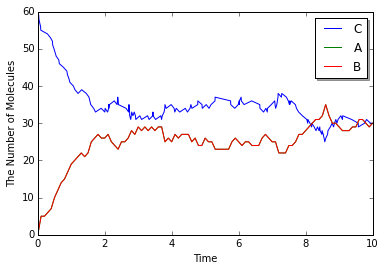

In [16]:
viz.plot_number_observer(obs1, obs2)

You can set the style for plotting, and even add an arbitrary function to plot.

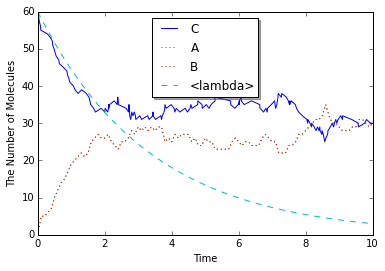

In [17]:
viz.plot_number_observer(obs1, '-', obs2, ':', lambda t: 60 * math.exp(-0.3 * t), '--')

Plotting in the phase plane is also available by specifing the x-axis and y-axis.

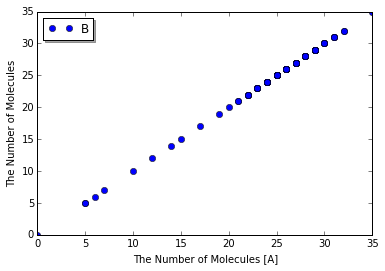

In [18]:
viz.plot_number_observer(obs2, 'o', x='A', y='B')

For spatial simulations, to visualize the state of `World`, `viz.plot_world` is available. This function plots the points of particles in three-dimensional volume in the interactive way. You can save the image by clicking a right button on the drawing region.

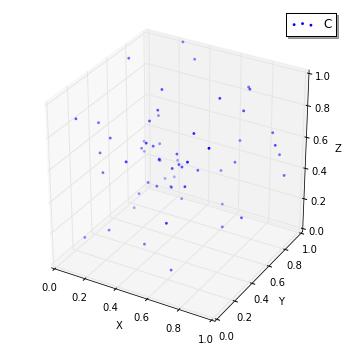

In [19]:
sim = create_simulator(spatiocyte.SpatiocyteFactory(0.005))
# viz.plot_world(sim.world())
viz.plot_world(sim.world(), interactive=False)

You can also make a movie from a series of HDF5 files, given as a `FixedIntervalHDF5Observer`. NOTE: `viz.plot_movie` requires an extra library, `ffmpeg`, when `interactive=False`.

In [20]:
sim = create_simulator(spatiocyte.SpatiocyteFactory(0.005))
obs1 = FixedIntervalHDF5Observer(0.02, 'test%02d.h5')
sim.run(1.0, obs1)
viz.plot_movie(obs1)

Start generating species_list ...
Start preparing mplot3d ...
Start making animation ...
Start generating a movie ...


Finally, corresponding to `FixedIntervalTrajectoryObserver`, `viz.plot_trajectory` provides a visualization of particle trajectories.

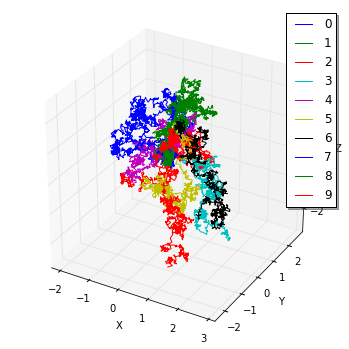

In [21]:
sim = create_simulator(spatiocyte.SpatiocyteFactory(0.005))
obs1 = FixedIntervalTrajectoryObserver(1e-3)
sim.run(1, obs1)
# viz.plot_trajectory(obs1)
viz.plot_trajectory(obs1, interactive=False)